In [57]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    diabetes.data, diabetes.target, random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
val_preds = model.predict(X_val)

print(r2_score(y_val, val_preds))
model.score(X_val, y_val)

0.3566675322939421


0.3566675322939421

In [71]:
def permutation_importance(fitted_model, metric, x_val: np.array, y_val: np.array, n_repeats=10):
    # предсказываем обученной моделью выборку
    preds = fitted_model.predict(x_val)
    # считаем метрику
    baseline = metric(y_val, preds)
    # создаем словарь для каждого признака
    imp = {i: [] for i in range(x_val.shape[1])}

    # для каждого признака
    for col in range(x_val.shape[1]):
        # проводим процедуру n_repeats раз, чтобы собрать статистику по каждому признаку
        for n in range(n_repeats):
            # сохраняем неизмененный признак
            save = x_val[:, col].copy()
            # случайно перемешиваем признак
            x_val[:, col] = np.random.permutation(x_val[:, col])
            # предсказываем моделью данные с перемешанным признаком
            pred_p = fitted_model.predict(x_val)
            # замеряем качество
            m = metric(y_val, pred_p)
            # возвращаем исходный признак
            x_val[:, col] = save
            # сохраняем статистику по данному признаку
            imp[col].append(baseline - m)
    return imp

In [72]:
imp = permutation_importance(model, r2_score, X_val, y_val, n_repeats=50)

In [73]:
for col, importance in imp.items():
    print('Col:', diabetes.feature_names[col])
    print(f'Importance={np.mean(importance):.3f}%±{np.std(importance):.3f}')

Col: age
Importance=-0.003%±0.004
Col: sex
Importance=0.048%±0.017
Col: bmi
Importance=0.168%±0.054
Col: bp
Importance=0.097%±0.031
Col: s1
Importance=0.047%±0.024
Col: s2
Importance=0.003%±0.002
Col: s3
Importance=0.006%±0.013
Col: s4
Importance=0.006%±0.007
Col: s5
Importance=0.223%±0.056
Col: s6
Importance=0.003%±0.003


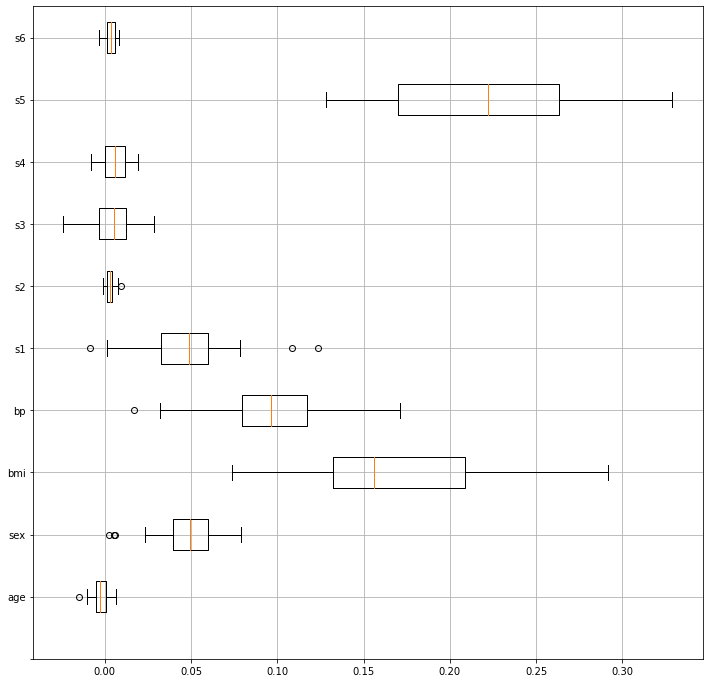

In [74]:
plt.figure(figsize=(12, 12))
plt.boxplot(imp.values(), vert=False)
plt.grid(True)
plt.yticks(range(X_val.shape[1]+1), labels=['']+diabetes.feature_names);

In [70]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023
